<a target="_blank" href="https://colab.research.google.com/drive/1uP-aE751u0xck-Xhci2NzD87IpX6dUz2?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Note:**

I attempted to complete the third part of my assignment, which involves a dimensionality reduction technique, using Databricks. However, I encountered a roadblock because Databricks requires an underlying AWS or Google Cloud platform. Unfortunately, I've already exhausted my free tier on these services, preventing me from progressing. I've attached screenshots to illustrate my efforts with Databricks. Consequently, I've decided to replicate the task using Google Colab as an alternative solution.

**Dataset Used**

Salary of Data Scientists: https://www.kaggle.com/datasets/piyushborhade/salary-of-data-scientists

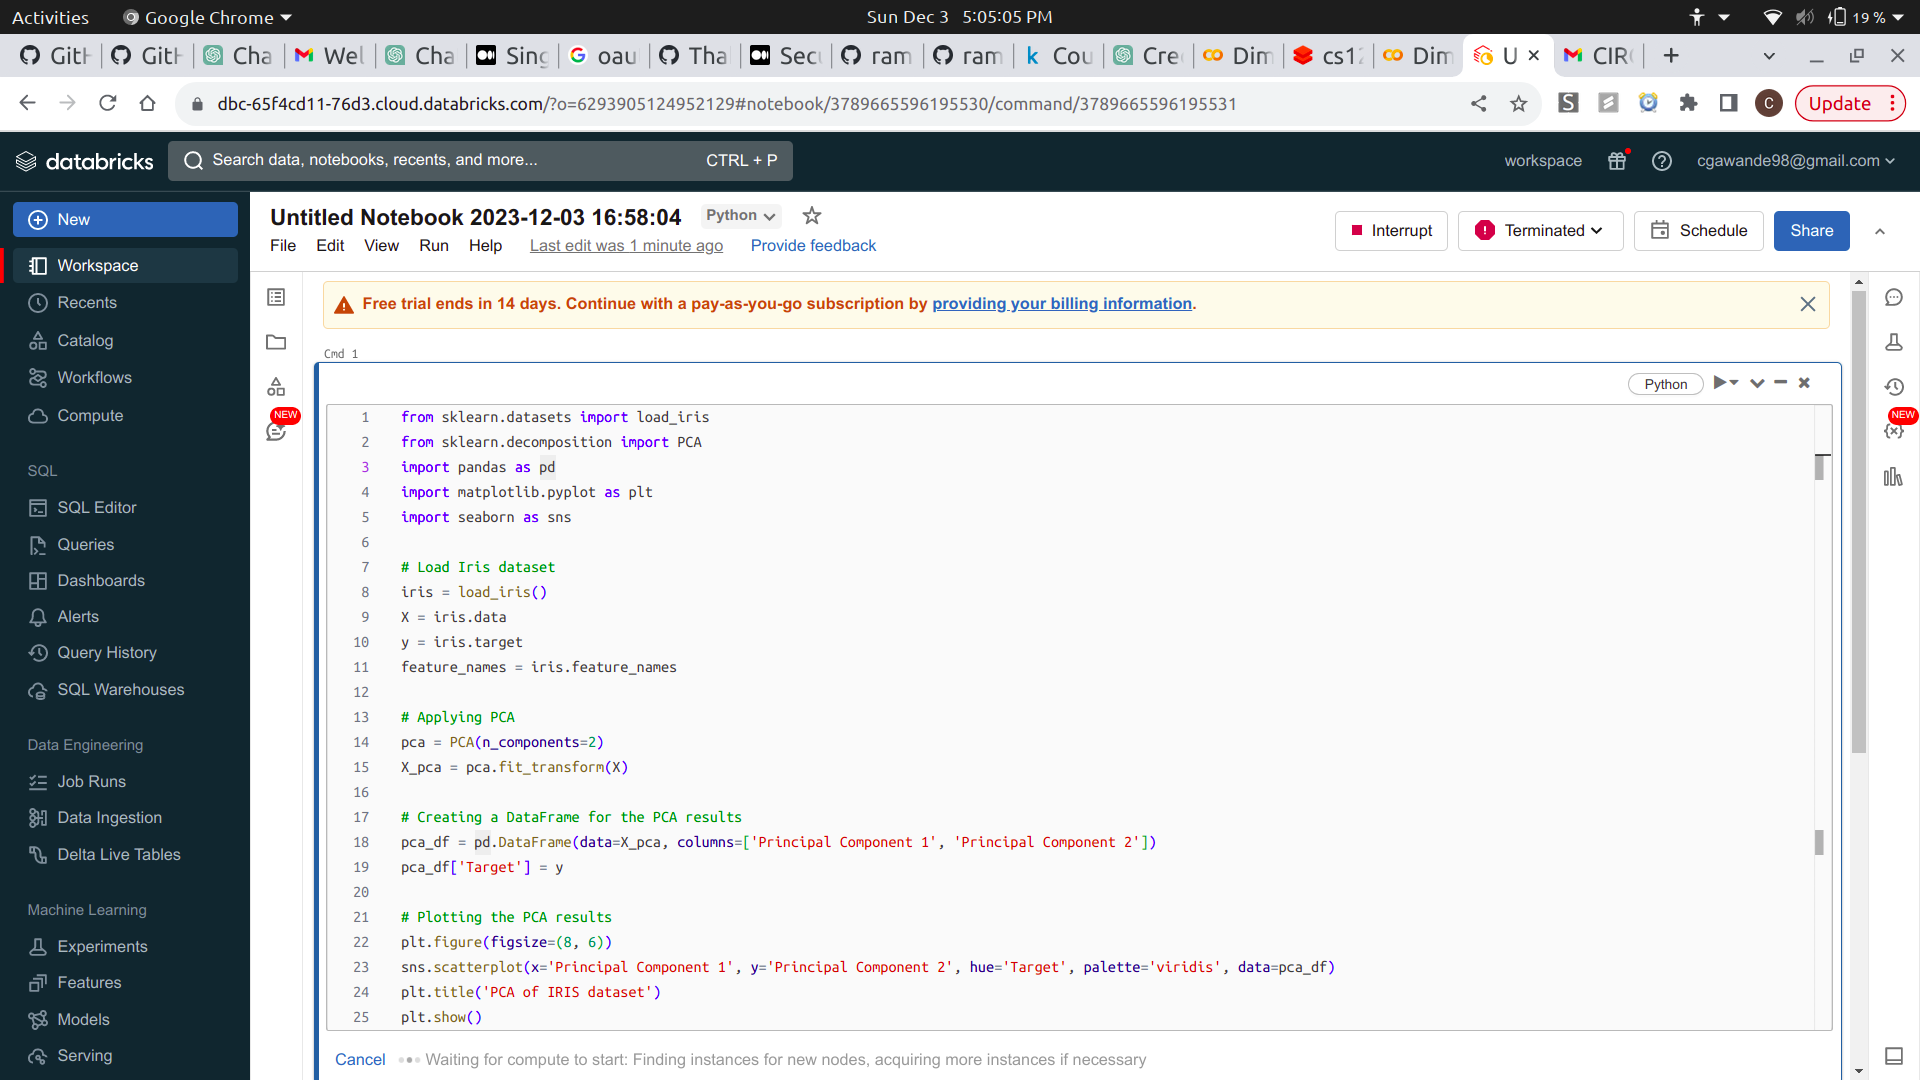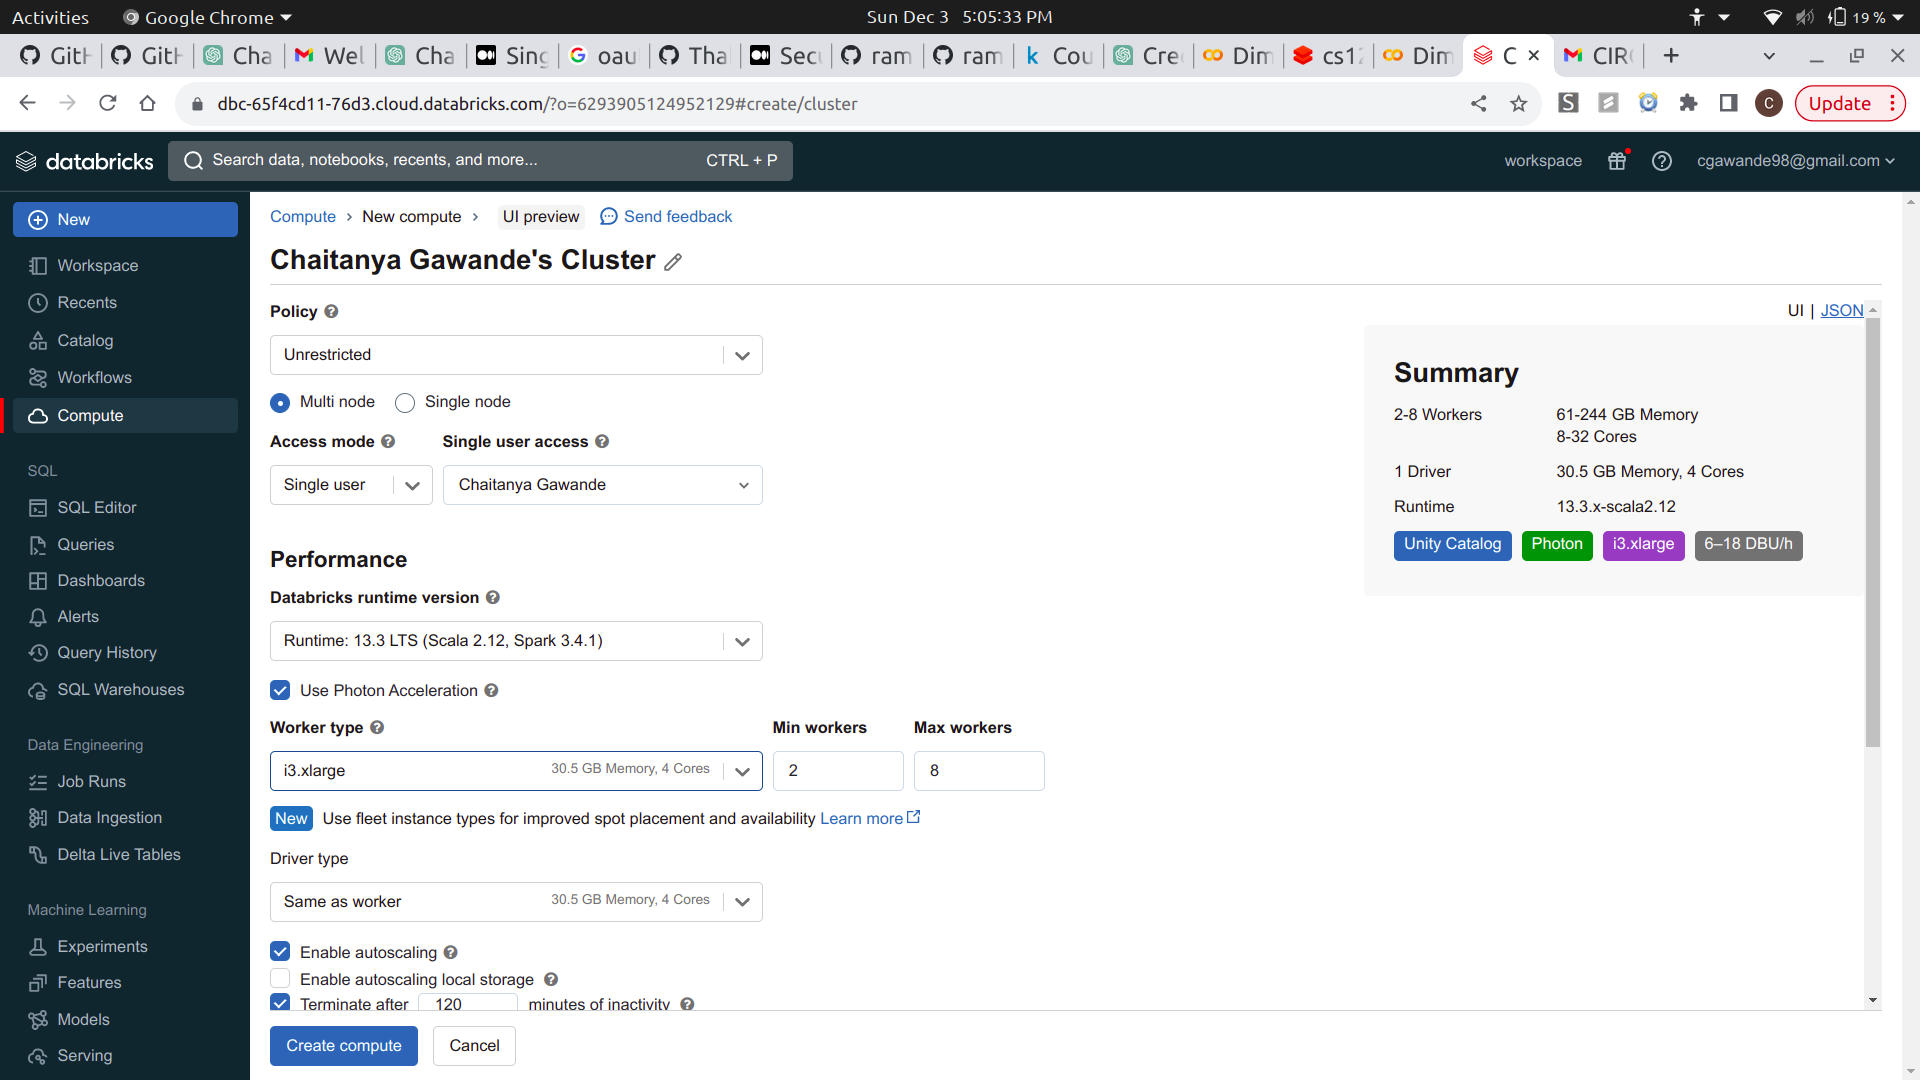

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets/salaries.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Data Description: Overview of the dataset including data types and unique values
data_info = data.info()
unique_values = data.nunique()

# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Overview of statistical summary of numeric columns
statistical_summary = data.describe()

data_info, unique_values, missing_values, statistical_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


(None,
 work_year                4
 experience_level         4
 employment_type          4
 job_title               93
 salary                 815
 salary_currency         20
 salary_in_usd         1035
 employee_residence      78
 remote_ratio             3
 company_location        72
 company_size             3
 dtype: int64,
 work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                0
 salary_currency       0
 salary_in_usd         0
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64,
          work_year        salary  salary_in_usd  remote_ratio
 count  3755.000000  3.755000e+03    3755.000000   3755.000000
 mean   2022.373635  1.906956e+05  137570.389880     46.271638
 std       0.691448  6.716765e+05   63055.625278     48.589050
 min    2020.000000  6.000000e+03    5132.000000      0.000000
 25%    2022.000000  1.000000e+05   95000.000000      0.000000
 5

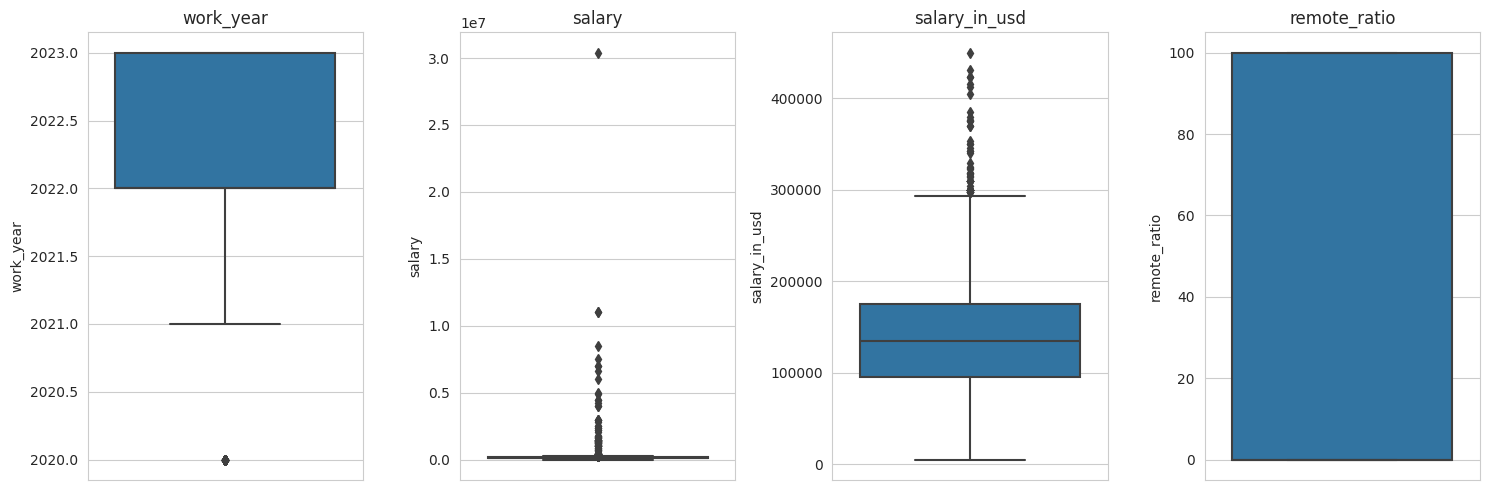

{'experience_level': array(['SE', 'MI', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'FL', 'PT'], dtype=object),
 'job_title': array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
        'Applied Scientist', 'Data Analyst', 'Data Modeler',
        'Research Engineer', 'Analytics Engineer',
        'Business Intelligence Engineer', 'Machine Learning Engineer',
        'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
        'Data Quality Analyst', 'Compliance Data Analyst',
        'Data Architect', 'Applied Machine Learning Engineer',
        'AI Developer', 'Research Scientist', 'Data Analytics Manager',
        'Business Data Analyst', 'Applied Data Scientist',
        'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
        'Head of Data', 'Data Science Manager', 'Data Manager',
        'Machine Learning Researcher', 'Big Data Engineer',
        'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
        'Dire

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for outliers in numerical columns
numerical_columns = data.select_dtypes(include=['int64']).columns
plt.figure(figsize=(15, 5))

# Plotting boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Checking the unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_uniques = {col: data[col].unique() for col in categorical_columns}

categorical_uniques

In [11]:
# Data Preparation

# Handling outliers in 'salary' and 'salary_in_usd'
# Using IQR to detect and handle outliers
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
data_cleaned = data[(data['salary_in_usd'] >= lower_bound) & (data['salary_in_usd'] <= upper_bound)]

# Checking the shape of the dataset after removing outliers
shape_after_outliers = data_cleaned.shape

# Encoding categorical variables (if necessary)
# Here we choose not to encode them yet as it depends on the specific analysis or modeling technique used later

shape_after_outliers

(3692, 11)

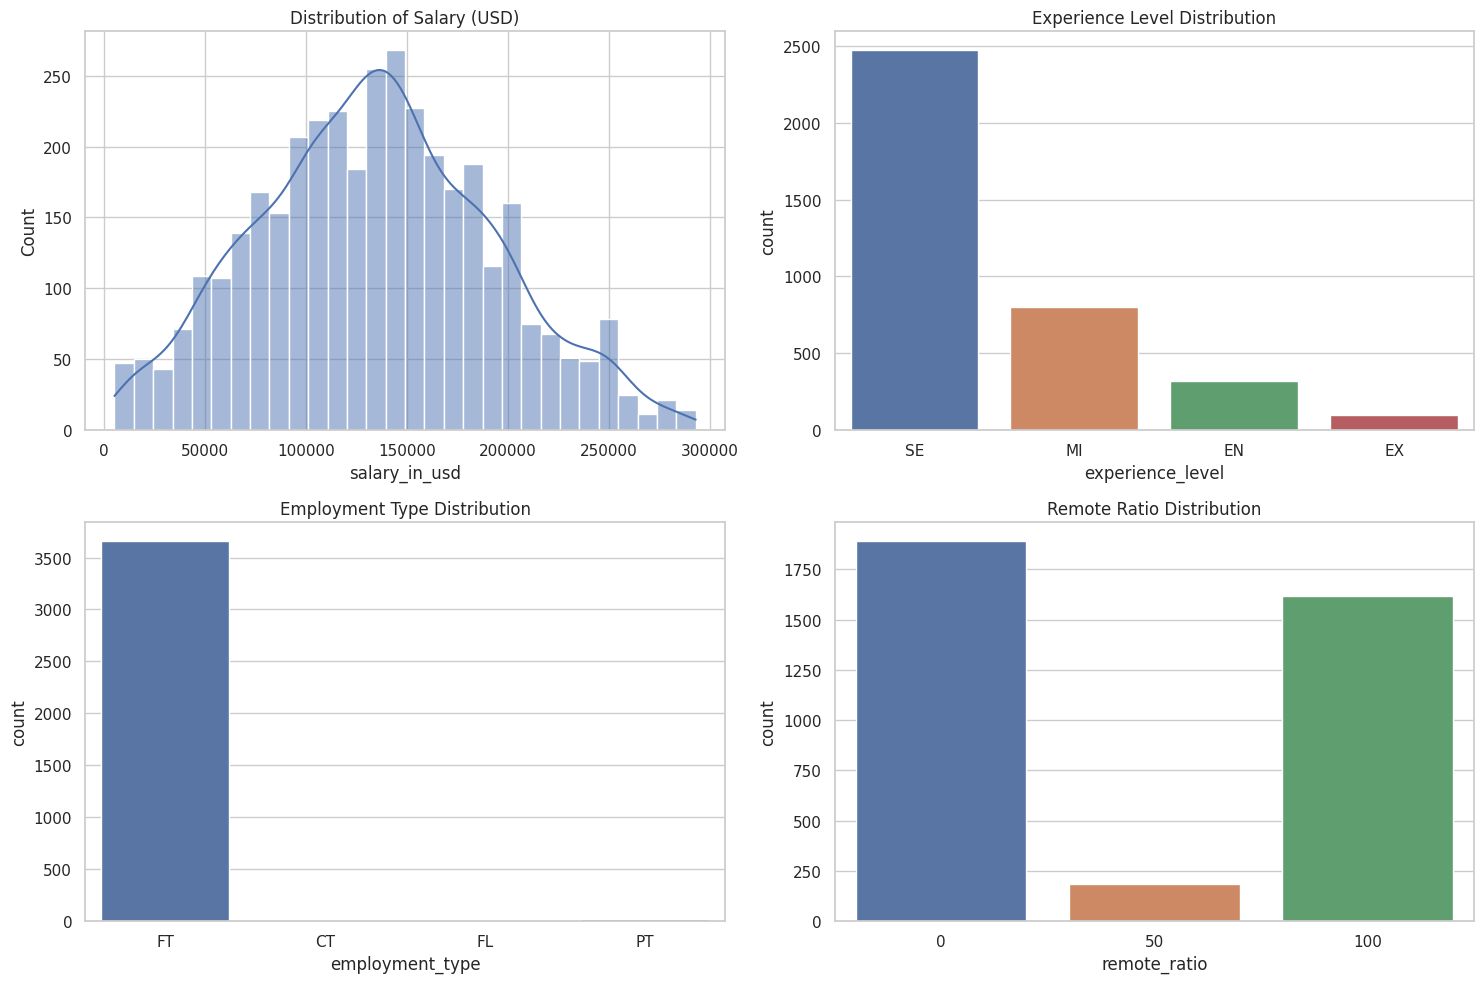

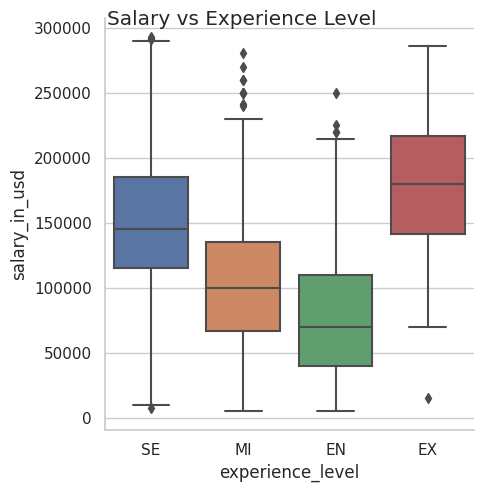

In [12]:
# Exploratory Data Analysis (EDA)

# Setting up the visualization environment
sns.set(style="whitegrid")

# Visualizing distributions of key variables: 'salary_in_usd', 'experience_level', 'employment_type', 'remote_ratio'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Salary distribution
sns.histplot(data_cleaned['salary_in_usd'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Salary (USD)')

# Experience level distribution
sns.countplot(x='experience_level', data=data_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Experience Level Distribution')

# Employment type distribution
sns.countplot(x='employment_type', data=data_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Employment Type Distribution')

# Remote ratio distribution
sns.countplot(x='remote_ratio', data=data_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Remote Ratio Distribution')

plt.tight_layout()
plt.show()

# Exploring relationships between salary and other key variables
# Scatter plots or correlation matrices can be useful here, depending on the data types
# For example, let's look at the relationship between salary and experience level
salary_experience_plot = sns.catplot(x="experience_level", y="salary_in_usd", kind="box", data=data_cleaned)
salary_experience_plot.fig.suptitle('Salary vs Experience Level')

plt.show()

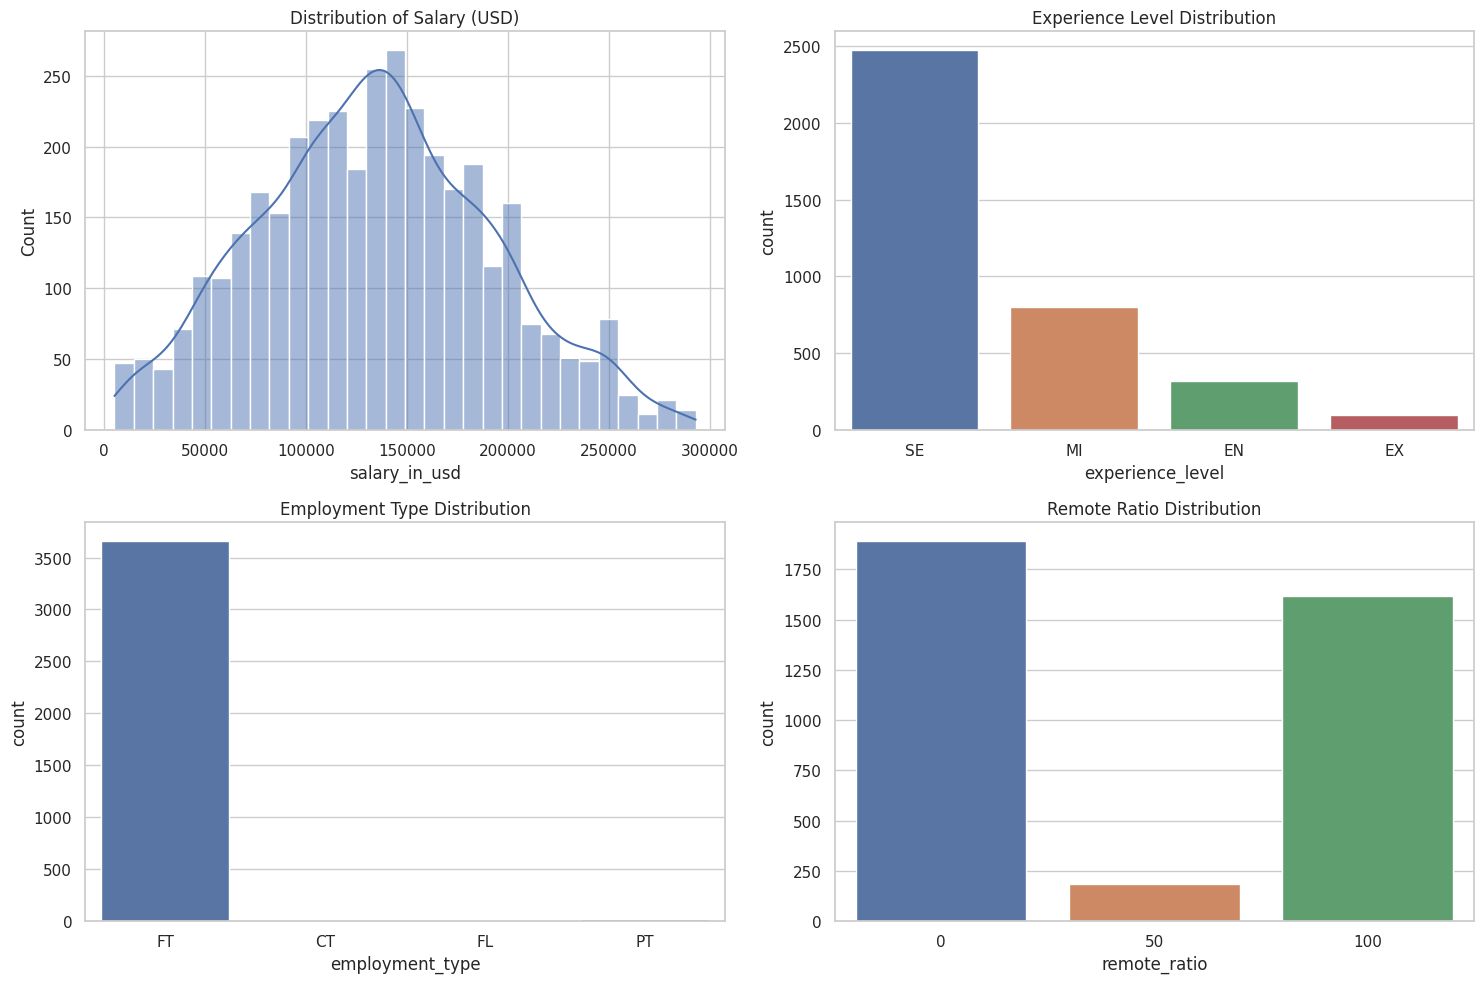

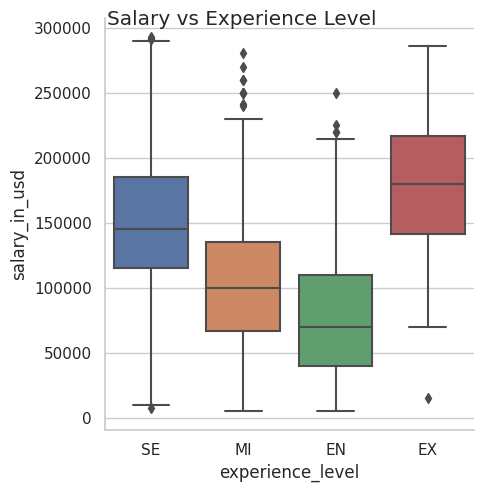

In [13]:
# Exploratory Data Analysis (EDA)

# Setting up the visualization environment
sns.set(style="whitegrid")

# Visualizing distributions of key variables: 'salary_in_usd', 'experience_level', 'employment_type', 'remote_ratio'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Salary distribution
sns.histplot(data_cleaned['salary_in_usd'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Salary (USD)')

# Experience level distribution
sns.countplot(x='experience_level', data=data_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Experience Level Distribution')

# Employment type distribution
sns.countplot(x='employment_type', data=data_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Employment Type Distribution')

# Remote ratio distribution
sns.countplot(x='remote_ratio', data=data_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Remote Ratio Distribution')

plt.tight_layout()
plt.show()

# Exploring relationships between salary and other key variables
# Scatter plots or correlation matrices can be useful here, depending on the data types
# For example, let's look at the relationship between salary and experience level
salary_experience_plot = sns.catplot(x="experience_level", y="salary_in_usd", kind="box", data=data_cleaned)
salary_experience_plot.fig.suptitle('Salary vs Experience Level')

plt.show()

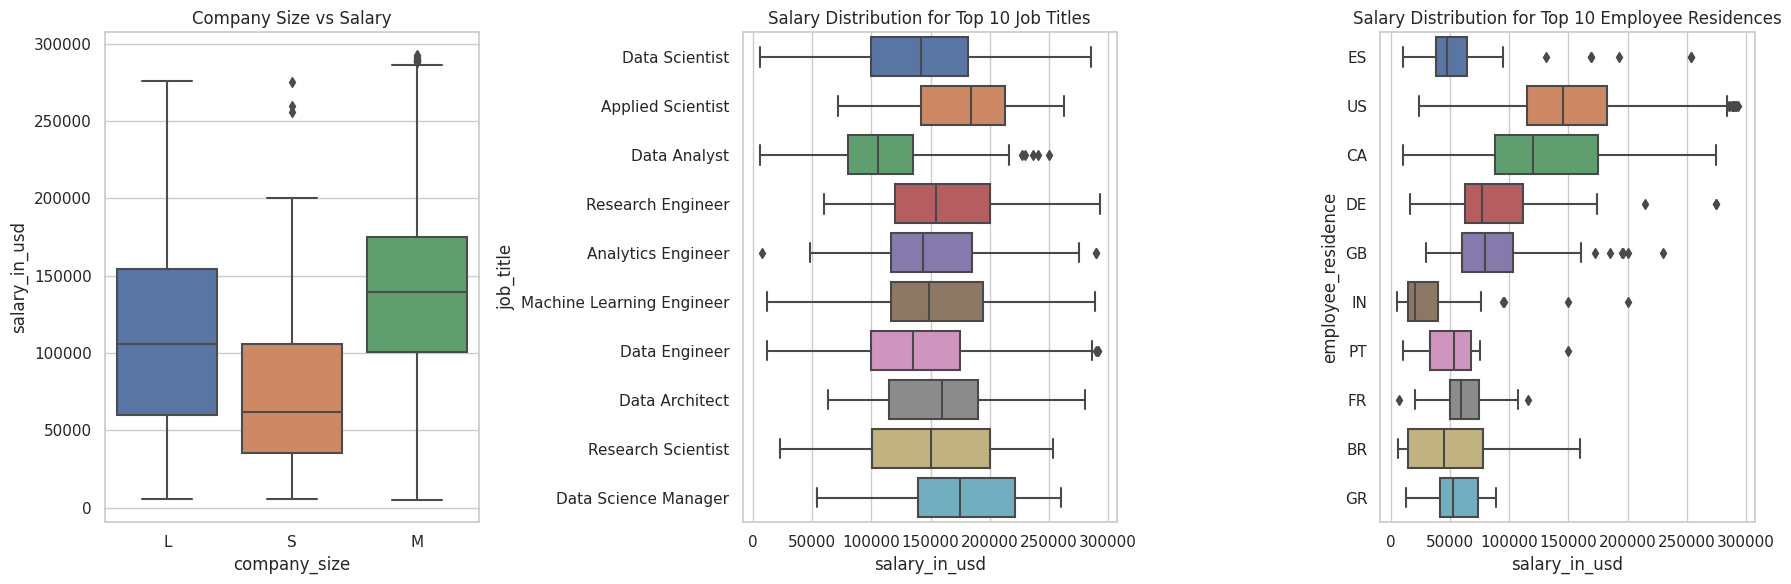

In [14]:
# Further Analysis: Exploring additional relationships and patterns in the data

# Setting up additional plots
plt.figure(figsize=(18, 6))

# Company size vs Salary
plt.subplot(1, 3, 1)
sns.boxplot(x='company_size', y='salary_in_usd', data=data_cleaned)
plt.title('Company Size vs Salary')

# Job title vs Salary (top 10 job titles by frequency)
top_job_titles = data_cleaned['job_title'].value_counts().head(10).index
filtered_data = data_cleaned[data_cleaned['job_title'].isin(top_job_titles)]
plt.subplot(1, 3, 2)
sns.boxplot(x='salary_in_usd', y='job_title', data=filtered_data, orient='h')
plt.title('Salary Distribution for Top 10 Job Titles')

# Employee residence vs Salary (top 10 countries by frequency)
top_residences = data_cleaned['employee_residence'].value_counts().head(10).index
filtered_data_residence = data_cleaned[data_cleaned['employee_residence'].isin(top_residences)]
plt.subplot(1, 3, 3)
sns.boxplot(x='salary_in_usd', y='employee_residence', data=filtered_data_residence, orient='h')
plt.title('Salary Distribution for Top 10 Employee Residences')

plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Preparing the data for feature selection

# Encoding categorical variables for feature importance analysis
label_encoder = LabelEncoder()
for col in categorical_columns:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# Separating the target variable and features
X = data_cleaned.drop('salary_in_usd', axis=1)
y = data_cleaned['salary_in_usd']

# Using Random Forest to determine feature importance
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Getting feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame for feature importances
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting features by importance
sorted_features = features.sort_values(by='Importance', ascending=False)

sorted_features

<ipython-input-15-496563f16c40>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])
<ipython-input-15-496563f16c40>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])
<ipython-input-15-496563f16c40>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Feature,Importance
4,salary,0.971744
5,salary_currency,0.021650
8,company_location,0.001568
6,employee_residence,0.001485
2,employment_type,0.001003
0,work_year,0.000785
3,job_title,0.000735
9,company_size,0.000449
7,remote_ratio,0.000293
1,experience_level,0.000287


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preparing the data for modeling (dropping 'salary' to avoid data leakage)
X_modeling = X.drop('salary', axis=1)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_modeling, y, test_size=0.2, random_state=42)

# Initializing models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Making predictions
linear_predictions = linear_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Evaluating models
def evaluate_model(predictions, actual):
    mae = mean_absolute_error(actual, predictions)
    mse = mean_squared_error(actual, predictions)
    r2 = r2_score(actual, predictions)
    return mae, mse, r2

linear_eval = evaluate_model(linear_predictions, y_test)
rf_eval = evaluate_model(rf_predictions, y_test)
gb_eval = evaluate_model(gb_predictions, y_test)

# Compiling evaluation results
evaluation_results = {
    'Linear Regression': linear_eval,
    'Random Forest': rf_eval,
    'Gradient Boosting': gb_eval
}

evaluation_results

{'Linear Regression': (39094.38388617005,
  2457188566.0208755,
  0.2852736172025677),
 'Random Forest': (35163.373293902216,
  2088837015.8727536,
  0.39241662392000887),
 'Gradient Boosting': (34317.64379779823,
  1967691284.6547835,
  0.4276544772382772)}

In [17]:
from sklearn.model_selection import GridSearchCV

# Parameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fitting the grid search
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}